# Este es mi TFM: un sistema recomendador de restaurantes# 

Aqui irán las distintas importaciones:

In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

Antes de importar los datos echemos una ojeada al fichero que describe los datos.

In [2]:
data_root = "./Data/"
readme = os.path.join(data_root, "README")
!cat $readme

1. Title of Database: Restaurant & consumer data, recommender systems domain

2. Sources:
   (a) Creators: 
Rafael Ponce Medellín and Juan Gabriel González Serna
rafaponce@cenidet.edu.mx, gabriel@cenidet.edu.mx
Department of Computer Science.
National Center for Research and Technological Development CENIDET, México
   (b) Donors of database:
Blanca Vargas-Govea and Juan Gabriel González Serna
blanca.vargas@cenidet.edu.mx/blanca.vg@gmail.com, gabriel@cenidet.edu.mx
Department of Computer Science.
National Center for Research and Technological Development CENIDET, México

3. Past Usage:
    (a) Blanca Vargas-Govea, Juan Gabriel González-Serna, Rafael Ponce-Medellín. Effects of relevant contextual features in the performance of a restaurant recommender system. In RecSys’11: Workshop on Context Aware Recommender Systems (CARS-2011), Chicago, IL, USA, October 23, 2011.
    (b) The task was to generate a top-n list of restaurants according to the consumer preferences. Finding the significan

Carguemos cada archivo para poder ver el contenido:

In [58]:
rTipoPago = pd.read_csv('Data/chefmozaccepts.csv',sep =",")

In [59]:
rTipoPago.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [61]:
len(rTipoPago["placeID"].unique())

615

In [62]:
rTipoPago["Rpayment"].unique()

array(['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Visa', 'Japan_Credit_Bureau', 'gift_certificates'],
      dtype=object)

## Ojo!!
Vemos que tenemos el valor VISA y Visa, para asegurarnos vamos a poner todo en mayusculas

In [63]:
rTipoPago["Rpayment"]=rTipoPago["Rpayment"].str.upper()

In [64]:
len(rTipoPago["Rpayment"].unique())

11

Ahora sí, vemos que este fichero contiene 615 restaurantes y 11 métodos de pago. Veamos los más usuales.

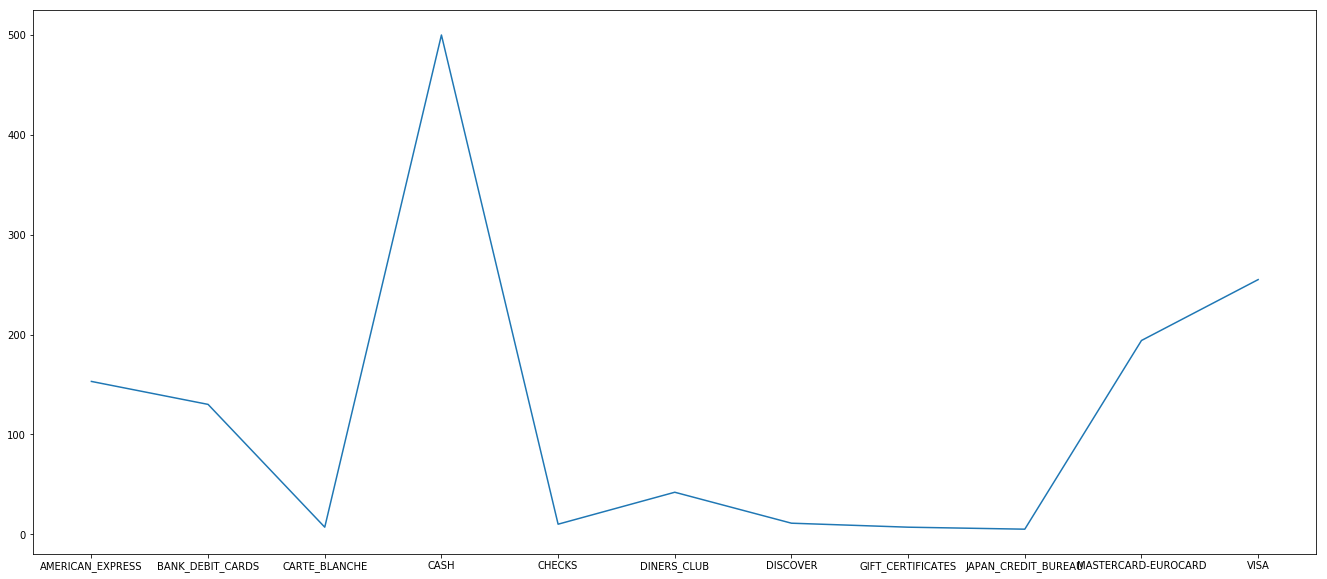

In [67]:
plt.figure(figsize=(23,10))
plt.plot(rTipoPago.groupby("Rpayment").count())

In [71]:
rTipoComida = pd.read_csv('Data/chefmozcuisine.csv',sep =",")

In [72]:
rTipoComida.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [73]:
len(rTipoComida["placeID"].unique())

769

In [81]:
rTipoComida["Rcuisine"].unique()

array(['Spanish', 'Italian', 'Latin_American', 'Mexican', 'Fast_Food',
       'Burgers', 'Dessert-Ice_Cream', 'Hot_Dogs', 'Steaks', 'Asian',
       'International', 'Mongolian', 'Vegetarian', 'Brazilian',
       'Cafe-Coffee_Shop', 'Cafeteria', 'Contemporary', 'Deli-Sandwiches',
       'Diner', 'Japanese', 'Sushi', 'Seafood', 'Chinese', 'Bar',
       'Bar_Pub_Brewery', 'Pizzeria', 'Mediterranean', 'American',
       'Family', 'Caribbean', 'African', 'Breakfast-Brunch', 'Regional',
       'Afghan', 'Bakery', 'Game', 'Armenian', 'Vietnamese', 'Korean',
       'Thai', 'Barbecue', 'Polish', 'Dutch-Belgian', 'French', 'German',
       'Southwestern', 'Persian', 'Ethiopian', 'Juice', 'Soup',
       'Continental-European', 'Greek', 'Southern', 'Eastern_European',
       'California', 'Bagels', 'Turkish', 'Organic-Healthy',
       'Fine_Dining'], dtype=object)

In [82]:
len(rTipoComida["Rcuisine"].unique())

59

Vemos que este fichero contiene 769 restaurantes y 59 tipos de comida. Veamos los más usuales.

In [95]:
Tipos_Comida_Comunes=rTipoComida.groupby("Rcuisine").count().sort_values(by = "placeID", ascending=False)
Tipos_Comida_Comunes.head(10)

,placeID
Rcuisine,
Mexican,239
International,62
American,59
Dutch-Belgian,55
Italian,42
Greek,33
Bar,32
French,31
Cafe-Coffee_Shop,27


In [96]:
rHorario = pd.read_csv('Data/chefmozhours4.csv',sep =",")
rHorario

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;
5,135110,00:00-00:00;,Sun;
6,135109,08:00-21:00;,Mon;Tue;Wed;Thu;Fri;
7,135109,08:00-21:00;,Sat;
8,135109,08:00-21:00;,Sun;
9,135108,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;


In [97]:
len(rHorario["placeID"].unique())

694

Este fichero contiene 694 restaurantes y sus respectivos horarios.

In [98]:
rParking=pd.read_csv('Data/chefmozparking.csv',sep =",")
rParking

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none
5,135106,none
6,135105,none
7,135104,yes
8,135103,valet parking
9,135102,valet parking


In [99]:
len(rParking["placeID"].unique())

675

In [100]:
rParking["parking_lot"].unique()

array(['public', 'none', 'yes', 'valet parking', 'fee', 'street',
       'validated parking'], dtype=object)

Este fichero contiene 675 restaurantes y 7 tipos de parking. Veamos los mas usuales.

In [102]:
rParking.groupby("parking_lot").count().sort_values(by = "placeID", ascending=False)

,placeID
parking_lot,
none,348
yes,174
public,102
street,32
fee,22
valet parking,21
validated parking,3
